In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

!pip install seaborn==0.9.0
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [0]:
#import the data
data=pd.read_csv(r'https://raw.githubusercontent.com/ssembahen/saved_files/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#visualiz e
print(data.head())
print(data['MaritalStatus'].unique())


   Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]
['Single' 'Married' 'Divorced']


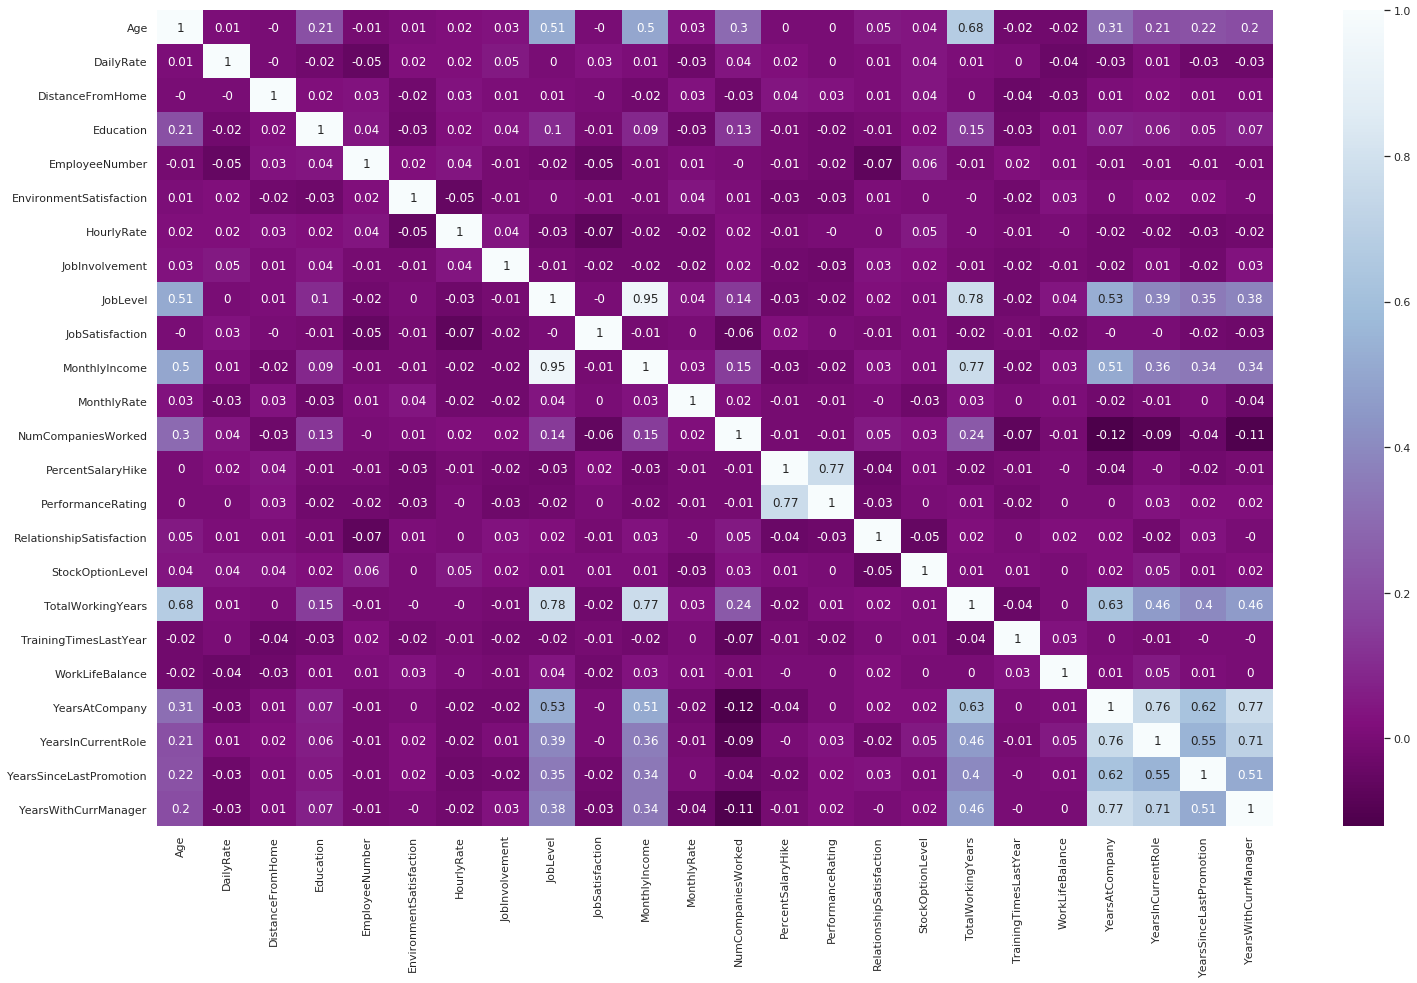

In [4]:
data=data.drop(['EmployeeCount',"StandardHours"], axis=1)
plt.figure(figsize=(25,15))
sns.heatmap(data.corr().round(2), cmap="BuPu_r", annot=True)

In [5]:
#describe the data
#no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

In [6]:
# view the columns
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#numeric columns
numeric_data=data._get_numeric_data()
numeric_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [0]:
# pairplot
#sns.pairplot(numeric_data)

In [9]:
# Size of Single, Married, and Divorced populations
print('single sample size:', len(data[data.MaritalStatus=='Single']))
print('married sample size:', len(data[data.MaritalStatus=='Married']))
print('divorced sample size:', len(data[data.MaritalStatus=='Divorced']))

single sample size: 470
married sample size: 673
divorced sample size: 327


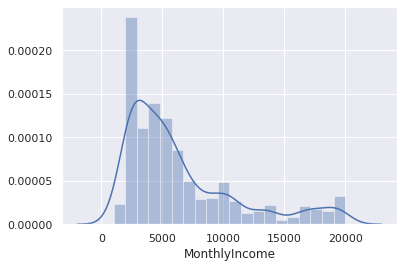

In [10]:
#A histogram for monthly income
ax = sns.distplot(data['MonthlyIncome'])

In [11]:
# Assign 1 for Attrition=Yes and 0 for Attrition=No
check={"Yes":1,"No":0}
data['AttritionCheck']=data['Attrition'].map(check)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionCheck
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0


In [12]:
# What is the attrition rate among single and married populations
print('Single attrition rate:', data[data.MaritalStatus=='Single'].AttritionCheck.mean())
print('Married attrition rate:', data[data.MaritalStatus=='Married'].AttritionCheck.mean())
print('Divorced attrition rate:', data[data.MaritalStatus=='Divorced'].AttritionCheck.mean())

Single attrition rate: 0.2553191489361702
Married attrition rate: 0.12481426448736999
Divorced attrition rate: 0.10091743119266056


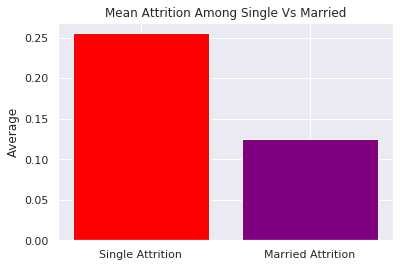

In [13]:
#Attrition rate by plotting
import plotly.express as px
single_attrition_mean=data[data.MaritalStatus=='Single'].AttritionCheck.mean()
married_attrition_mean=data[data.MaritalStatus=='Married'].AttritionCheck.mean()
height=(single_attrition_mean,married_attrition_mean)
bars=("Single Attrition","Married Attrition")
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['red', 'purple'])
plt.xticks(y_pos, bars)
plt.title('Mean Attrition Among Single Vs Married')
plt.ylabel('Average')
plt.show()



In [14]:
#Is there a significant difference between the single and married group with regard to attrition?
stats.ttest_ind(data[data.MaritalStatus=='Single'].AttritionCheck,
                data[data.MaritalStatus=='Married'].AttritionCheck)

Ttest_indResult(statistic=5.746092971896814, pvalue=1.170858376726938e-08)

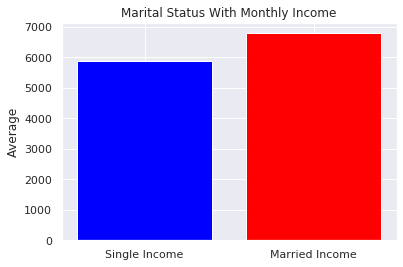

In [15]:
#Marital Status by Monthly Income Bar Plot
single_monthlyincome_mean=data[data.MaritalStatus=='Single'].MonthlyIncome.mean()
married_monthlyincome_mean=data[data.MaritalStatus=='Married'].MonthlyIncome.mean()
height=(single_monthlyincome_mean,married_monthlyincome_mean)
bars=("Single Income","Married Income")
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue', 'red'])
plt.xticks(y_pos, bars)
plt.title('Marital Status With Monthly Income')
plt.ylabel('Average')
plt.show()



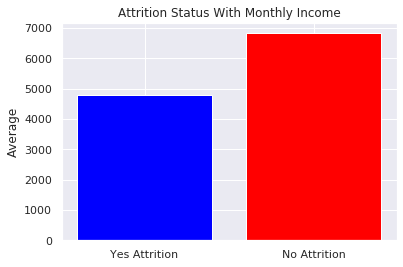

In [16]:
# Monthly Income With Attrition Rate Bar Plot
yesattr_monthlyincome_mean=data[data.Attrition=='Yes'].MonthlyIncome.mean()
noattr_monthlyincome_mean=data[data.Attrition=='No'].MonthlyIncome.mean()
height=(yesattr_monthlyincome_mean,noattr_monthlyincome_mean)
bars=("Yes Attrition","No Attrition")
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue', 'red'])
plt.xticks(y_pos, bars)
plt.title('Attrition Status With Monthly Income')
plt.ylabel('Average')
plt.show()


Text(0, 0.5, 'Marital status')

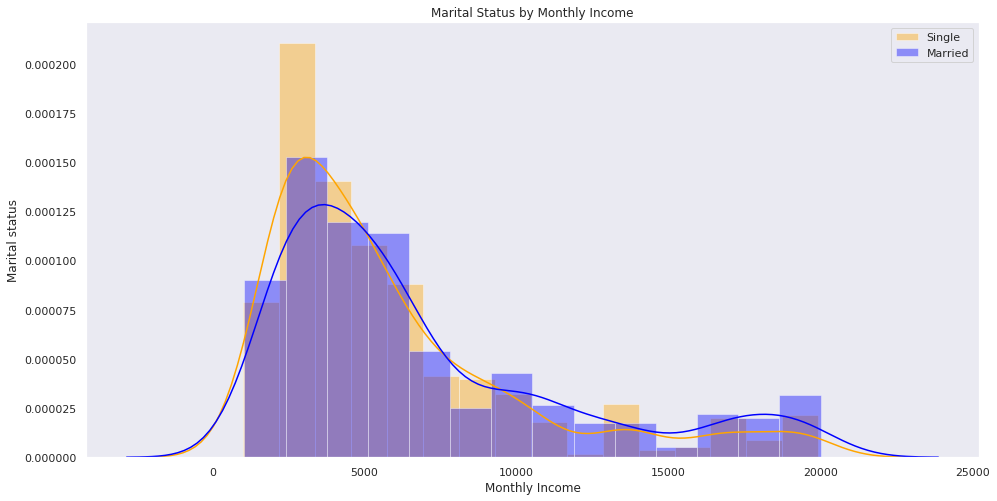

In [17]:
#Why is the attrition rate high among single>married>Divorced
#Check monthly income
#Could be a factor. Lower income, more single population. Higher Income, more married
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['MonthlyIncome']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['MonthlyIncome']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by Monthly Income')
plt.legend()
plt.xlabel('Monthly Income')
plt.ylabel('Marital status')


Text(0, 0.5, 'Attrition')

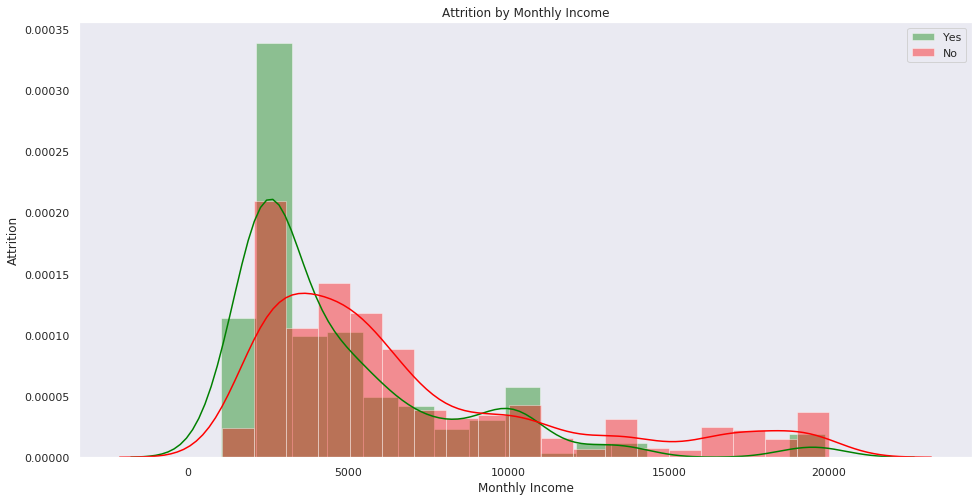

In [18]:
#Why is the attrition rate high among single>married>Divorced
#Check Attrition vs Monthly income
#We see attrition rate going down with higher income
#Also good probable explanation
attrition_yes=data.loc[data['Attrition']=='Yes']
attrition_no=data.loc[data['Attrition']=='No']

plt.figure(figsize=(16,8))
sns.distplot(attrition_yes[['MonthlyIncome']],color='green',label="Yes", hist_kws={'alpha':.4})
sns.distplot(attrition_no[['MonthlyIncome']],color='red',label="No", hist_kws={'alpha':.4})
plt.grid()
plt.title('Attrition by Monthly Income')
plt.legend()
plt.xlabel('Monthly Income')
plt.ylabel('Attrition')


Text(0, 0.5, 'Marital status')

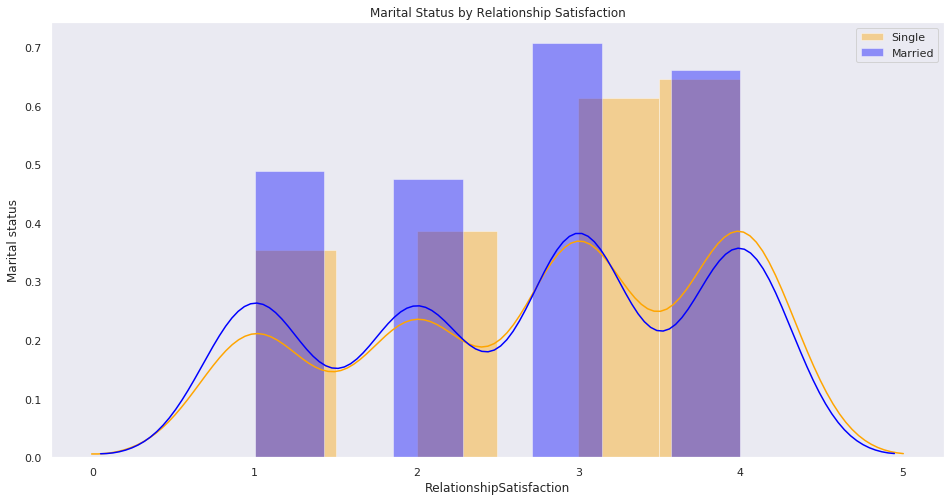

In [19]:
#Why is the attrition rate high among single>married>Divorced
#Check Relationship Satisfaction
#Some slight differences but not so significant
#Probalby not a factor
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['RelationshipSatisfaction']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['RelationshipSatisfaction']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by Relationship Satisfaction')
plt.legend()
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Marital status')



Text(0, 0.5, 'Marital status')

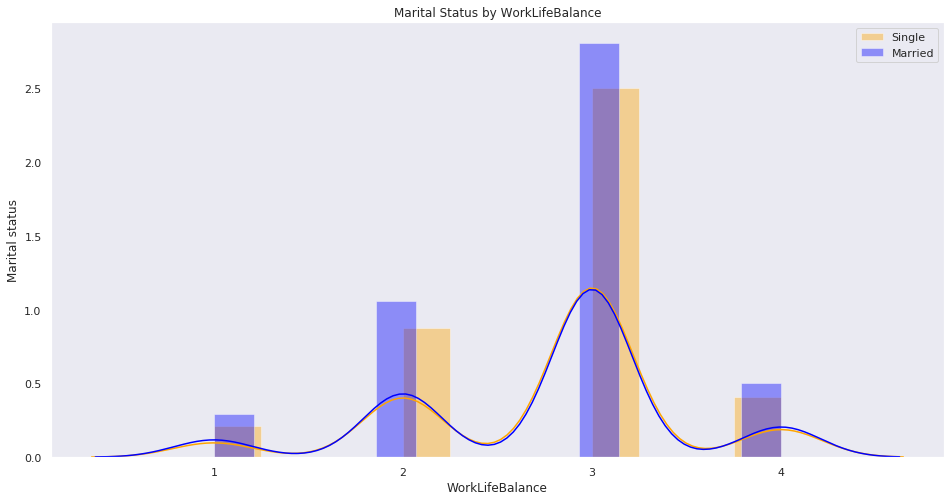

In [20]:
#Check work-life balance
#Still does not tell a good story
# 
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['WorkLifeBalance']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['WorkLifeBalance']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by WorkLifeBalance')
plt.legend()
plt.xlabel('WorkLifeBalance')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

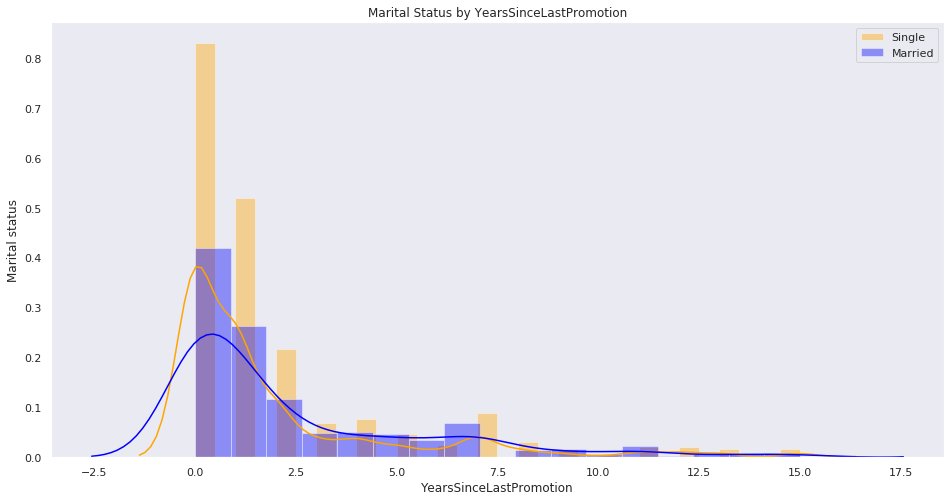

In [21]:
# consider YearsSinceLastPromotion
#Also does not clearly explain
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['YearsSinceLastPromotion']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['YearsSinceLastPromotion']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by YearsSinceLastPromotion')
plt.legend()
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

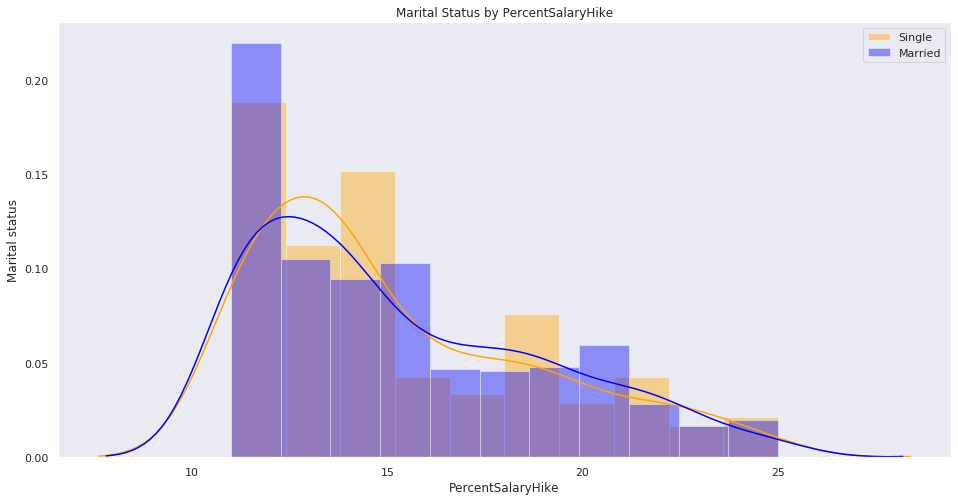

In [22]:
#Percent Salary Hike
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['PercentSalaryHike']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['PercentSalaryHike']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by PercentSalaryHike')
plt.legend()
plt.xlabel('PercentSalaryHike')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

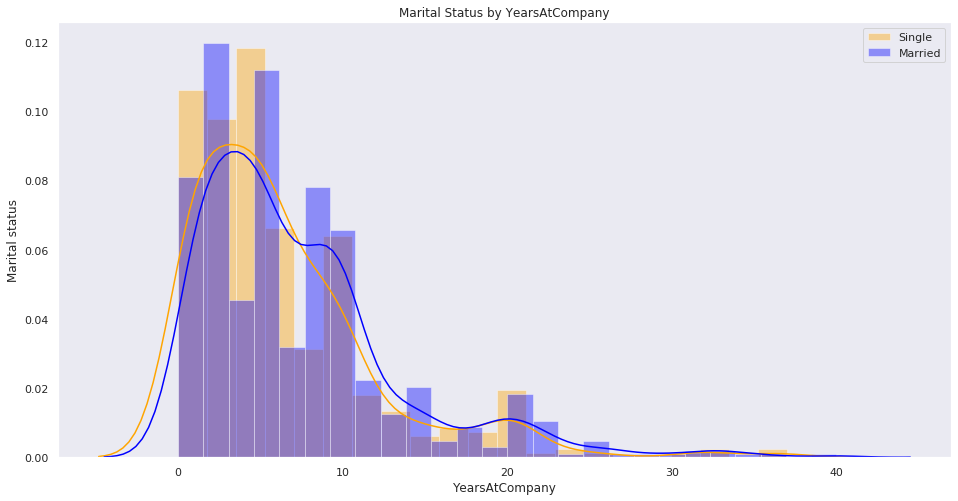

In [23]:
#Years at company
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['YearsAtCompany']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['YearsAtCompany']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by YearsAtCompany')
plt.legend()
plt.xlabel('YearsAtCompany')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

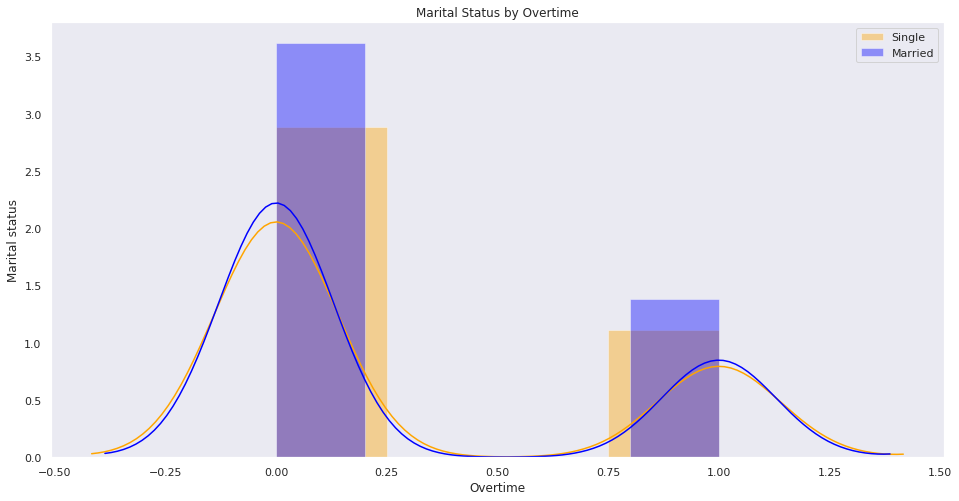

In [24]:
#Overtime
#Also does not clearly explain the hypothesis
check={"Yes":1,"No":0}
data['OverTimeCheck']=data['OverTime'].map(check)

data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['OverTimeCheck']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['OverTimeCheck']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by Overtime')
plt.legend()
plt.xlabel('Overtime')
plt.ylabel('Marital status')

In [0]:
# Conclusion. Some contributing factors to higher attrition among single vs married are Monthly Income, Percent Salary Hike
#and Years at company. This could inadvertently mean that there is a higher percantage of married people who have 
#been working longer at the company, thus are having a higher salary and are getting slightly better salary increase.

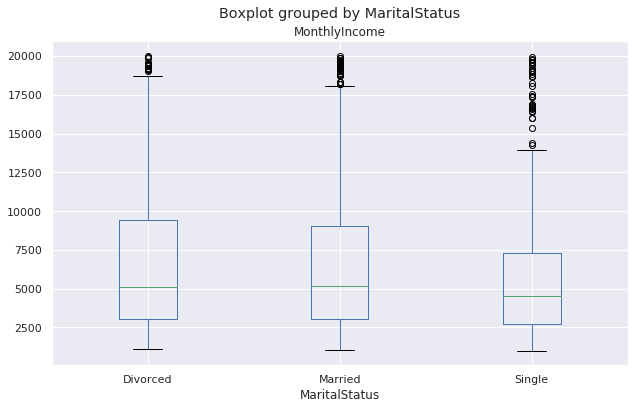

In [26]:
# Box plot for monthly income
data.boxplot('MonthlyIncome', by='MaritalStatus', figsize=(10,6) )

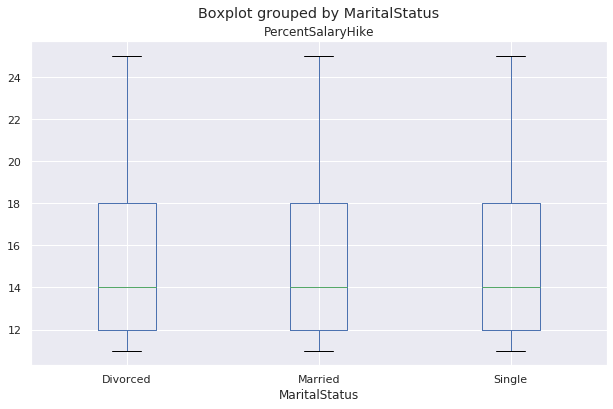

In [27]:
#Box plot for percent salary hike
data.boxplot('PercentSalaryHike', by='MaritalStatus', figsize=(10,6) )


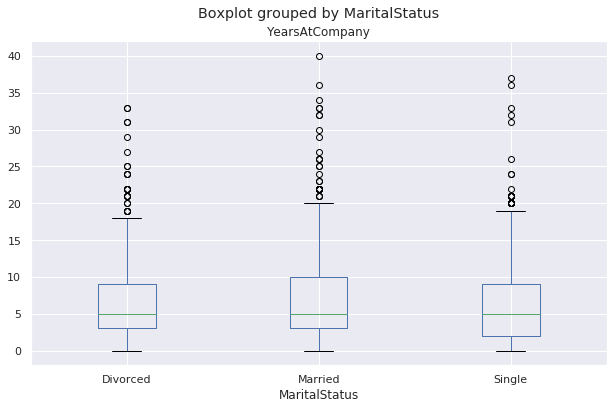

In [28]:
#Years at company
#Boxplot
data.boxplot('YearsAtCompany', by='MaritalStatus', figsize=(10,6) )


In [29]:
#Anova
Single = data[data['MaritalStatus'] == 'Single']
Married = data[data['MaritalStatus'] == 'Married']
Divorced = data[data['MaritalStatus'] == 'Divorced']
stats.f_oneway(Single['MonthlyIncome'], Married['MonthlyIncome'], Divorced['MonthlyIncome'])

F_onewayResult(statistic=5.904753323759054, pvalue=0.002791675956684596)

In [30]:
#Effect size is a statistical concept that measures the strength
# of the relationship between two variables on a numeric scale.
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionCheck,OverTimeCheck
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,0


In [31]:
print(data['MaritalStatus'].unique())
to_del=data[data['MaritalStatus'].isin(['Divorced'])].index.tolist()
data=data.drop(to_del)
#sns.scatterplot(x="MonthlyIncome", y="TotalWorkingYears", hue="MaritalStatus", data=data);
print(data['MaritalStatus'].unique())

['Single' 'Married' 'Divorced']
['Single' 'Married']
